In [1]:
import numpy as np
import torch
import pandas as pd
import scipy
from scipy.io import loadmat
import seaborn as sns
from points_type import *
from matplotlib import cm
from input_preprocessing import *
import matplotlib.pyplot as plt
%matplotlib inline
from metrics import *
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

In [228]:
test_data = loadmat('examples/benchmarking_data/schrodinger_test.mat')

In [2]:
torch.cuda.is_available()

True

In [229]:
data = test_data['uu'].reshape(-1,1)

In [230]:
u = np.real(data).reshape(-1)
v = np.imag(data).reshape(-1)

In [127]:
x_grid = np.linspace(-5,5,256)
t_grid = np.linspace(0,np.pi/2,201)

x = torch.from_numpy(x_grid)
t = torch.from_numpy(t_grid)

grid_test = torch.cartesian_prod(x, t).float()

In [138]:
n = [10, 20, 30, 40]
dct = {'grid': [], 'interpolated_values_u': []}
for number in n:
    x_grid = np.linspace(-5,5,number+1)
    t_grid = np.linspace(0,np.pi/2,number+1)

    x = torch.from_numpy(x_grid)
    t = torch.from_numpy(t_grid)

    grid = torch.cartesian_prod(x, t).float()
    interpolated_values = scipy.interpolate.griddata(grid_test, u, grid, method='cubic')
    N = [number for i in range(len(interpolated_values))]
    dct['grid'].extend(N)
    dct['interpolated_values_u'].extend(interpolated_values)
test_data = pd.DataFrame(dct)

In [177]:
experiment_data_10 = pd.read_csv('examples/benchmarking_data/schrodinger_experiment_[10]_cache=False.csv')
experiment_data_20_30 = pd.read_csv('examples/benchmarking_data/schrodinger_experiment_[20, 30]_cache=False.csv')
experiment_data_40 = pd.read_csv('examples/benchmarking_data/schrodinger_experiment_[40]_cache=False.csv')

In [178]:
time_list_20 = [2207.342264, 1902.780795 , 2051.769395, 1990.625440, 1669.295443, 1630.366187, 1723.594879, 1735.121449,
                1989.412900, 1873.436806]
time_list_30 = [3609.354969, 3564.459932, 3626.499491, 3613.533968, 3818.807240, 3496.345418, 3819.675368,
                3774.777136, 3795.635416, 3678.129626]
time_20 = []
for val in time_list_20:
    time_20_i = [val for i in range(21*21)]
    time_20.append(time_20_i)

time_30 = []
for val in time_list_30:
    time_30_i = [val for i in range(31*31)]
    time_30.append(time_30_i)

time_20 = np.concatenate(time_20)
time_30 = np.concatenate(time_30)
time_20_30 = np.concatenate((time_20, time_30))

In [179]:
experiment_data_20_30['time'] = time_20_30

In [180]:
experiment_data = pd.concat([experiment_data_10, experiment_data_20_30, experiment_data_40])

In [181]:
experiment_data

,n_iter,grid,u,v,time
0,0,10,0.022888,-0.000939,614.424292
1,0,10,0.041829,0.003819,614.424292
2,0,10,0.055094,0.011037,614.424292
3,0,10,0.062073,0.018570,614.424292
4,0,10,0.065190,0.025084,614.424292
...,...,...,...,...,...
16805,9,40,0.029098,0.052447,7034.597967
16806,9,40,0.028391,0.053487,7034.597967
16807,9,40,0.027643,0.054499,7034.597967
16808,9,40,0.026854,0.055485,7034.597967


In [191]:
i = 1
n = 10
experiment_data.query(f'n_iter == {i} and grid == {n}')['time'].values[0]

604.3163278102875

In [208]:
experiment_result = {'grid': [], 'n_iter': [], 'rmse': [],'nrmse': [], 'time': []}
for grid in range(10,50,10):
    for n_iter in range(10):
        test = test_data[test_data['grid'] == grid]['interpolated_values_u'].values
        result = experiment_data.query(f'n_iter == {n_iter} and grid == {grid}')['u'].values
        rmse = np.sqrt(np.mean((test - result) ** 2))
        nrmse = rmse / np.std(result)
        time = experiment_data.query(f'n_iter == {n_iter} and grid == {grid}')['time'].values[0]
        experiment_result['grid'].append(grid+1)
        experiment_result['n_iter'].append(n_iter)
        experiment_result['rmse'].append(rmse)
        experiment_result['nrmse'].append(nrmse)
        experiment_result['time'].append(time)

In [209]:
data = pd.DataFrame(experiment_result)

<AxesSubplot: xlabel='grid', ylabel='rmse'>

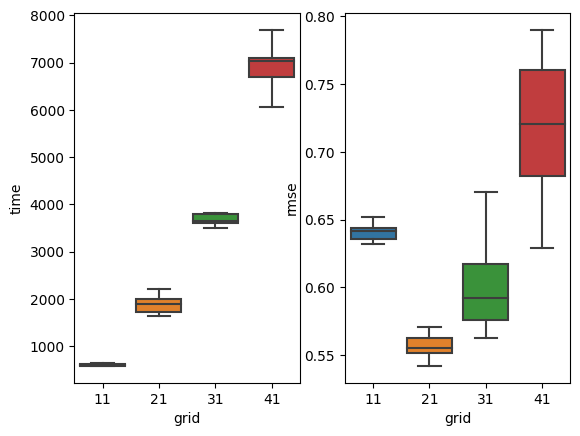

In [210]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(ax=axes[0],x='grid', y='time', data=data , showfliers=False)

sns.boxplot(ax=axes[1],x='grid', y='rmse', data=data, showfliers=False)


In [233]:
x_grid = np.linspace(-5,5,256)
t_grid = np.linspace(0,np.pi/2,201)

x = torch.from_numpy(x_grid)
t = torch.from_numpy(t_grid)

grid_test = torch.cartesian_prod(x, t).float()
# model_interp = test_data[test_data['grid'] == 10]['interpolated_values_u'].values

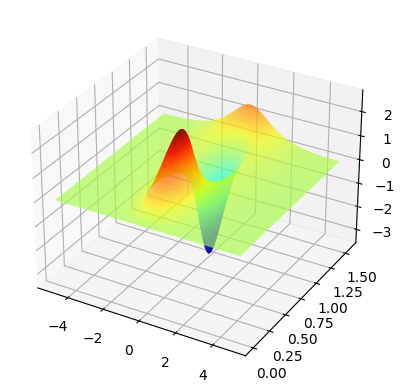

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(grid_test[:, 0].detach().numpy().reshape(-1), grid_test[:, 1].detach().numpy().reshape(-1),
                v, cmap=cm.jet,linewidth=0.2, alpha=1)

array([ 0.02695056,  0.03260382,  0.03420716,  0.03475574,  0.03492699,
        0.034309  ,  0.03360063,  0.03225105,  0.03112513,  0.02763927,
        0.02636017,  0.07295037,  0.07319679,  0.069523  ,  0.06700413,
        0.06497201,  0.06289575,  0.06013422,  0.05698216,  0.05429713,
        0.05016175,  0.04734092,  0.19711746,  0.1959615 ,  0.19299055,
        0.19102151,  0.1856891 ,  0.17916657,  0.17192488,  0.16365532,
        0.15508521,  0.14466002,  0.13431266,  0.52562333,  0.51784725,
        0.49690626,  0.47210287,  0.44857975,  0.43657531,  0.4349855 ,
        0.43444197,  0.42871452,  0.40757898,  0.37171966,  1.28071124,
        1.19795536,  0.97999627,  0.71583666,  0.52882028,  0.52176611,
        0.69010228,  0.92236583,  1.08294288,  1.08007742,  0.90557495,
        1.99958073,  1.76528341,  0.98348639, -0.58226342, -2.94717013,
       -3.68001601, -0.72895298,  1.52340548,  2.18368684,  2.02259221,
        1.41672212,  1.31929761,  1.22996009,  0.99357603,  0.70

In [231]:
u

array([0.02695056, 0.02827012, 0.0288274 , ..., 0.02668994, 0.02647879,
       0.02632516])